## Poročilo vaja 2.2
#### Kontingenčne tabele: anketa za nogometne trenerje

Imamo podatke ankete "**Anketa za nogometne trenerje**": *anketa_precisceni 26 13 nogomet trenerji.sav*

1. Ugotovite, ali obstajajo razlike v nivoju treniranja (Q14) glede na kakšnem nivoju je igral trener kot aktiven nogometaš (Q12)?
   - Analizo opremite s kontingenčno tabeli, ustreznim grafom in statističnim testom.
2. Naredite analizo, kjer preučujete, ali je odnos do poklica trenerjev (Q18) odvisen od stopnje (Q41) in področja izobrazbe (Q42):
   - Analize naredite glede na kategorije, kot so bile zajete v anketi.
   - Analize naredite na združenih kategorijah na dve področji tako pri stopnji izobrazbe kot pri področju izobrazbe.
   - Vse analize opremite s kontingenčnimi tabelami, ustreznimi grafi in statističnimi testi.
3. Katera anketna vprašanja lahko obdelamo na način kot smo ga izvajali pri tej vaji?

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chisquare

pd.set_option('display.max_columns', None)

path = os.path.join(os.getcwd(), 'data')
file_name = '\\anketa114621-2024-03-04.xlsx'
df = pd.read_excel(path + file_name)
cols_to_keep = ['Q12', 'Q14', 'Q18a','Q18b', 'Q18c', 'Q41', 'Q42']
cols = list(df.columns)
cols_to_drop = [c for c in cols if c not in cols_to_keep]
df = df.drop(columns=cols_to_drop)

In [85]:
questions = df.iloc[0,:]
df = df.drop(labels=0, axis='index')

In [87]:
df['Stopnja izobrazbe'] = pd.cut(x=df['Q41'],
                   bins=[0,2,99],
                   labels=['<= srednjesolska', '> srednjesolska'])
df['Področje izobrazbe'] = np.where(df['Q42'] == 11, 'Športno treniranje', 'Drugo')
df['Tekmovalni nivo trenerja'] = df['Q12'].where(df['Q12'] >= 0, np.nan).map({
    1: 'Reprezentanči nivo',
    2: 'Državni nivo',
    3: 'Regionalni nivo',
    4: 'Občinski nivo'
})
df['Nivo trenirane ekipe'] = df['Q14'].where(df['Q14'] >= 0, np.nan).map({
    1: 'Državni nivo',
    2: 'Deželni/regionalni nivo',
    3: 'Trenutno nisem trener nobene ekipe',
    4: 'Drugo'
})

In [88]:
df_clean = df[['Tekmovalni nivo trenerja', 'Nivo trenirane ekipe']].dropna()

contingency_table = pd.crosstab(df_clean['Tekmovalni nivo trenerja'], df['Nivo trenirane ekipe'])
table_w_margin = pd.crosstab(df_clean['Tekmovalni nivo trenerja'], df['Nivo trenirane ekipe'], margins=True, margins_name='Skupaj')
styled_table = table_w_margin.style.set_caption("Kontingenčna tabela: Nivo trenirane ekipe vs tekmovalni nivo trenerja")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])
display(styled_table)

Nivo trenirane ekipe,Deželni/regionalni nivo,Drugo,Državni nivo,Trenutno nisem trener nobene ekipe,Skupaj
Tekmovalni nivo trenerja,,,,,
Državni nivo,207,15,130,25,377
Občinski nivo,53,8,8,1,70
Regionalni nivo,153,8,40,12,213
Reprezentanči nivo,26,6,39,5,76
Skupaj,439,37,217,43,736


**S hi-kvadrat testom izračunamo oz. dokažemo ali obstaja povezava med spremenljivkami.**

*H0: Med tekmovalnim nivojem trenerja in nivojem ekipe, ki jo trener trenira ni povezave*

*H1: Obstaja povezava med tekmovalnim nivojem trenerja in nivojem ekipe, ki jo trener trenira*

In [89]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_table = {'value': [f'{chi2:.2f}', f'{table_w_margin.iloc[-1, -1]}'],
             'dof': [dof, ''],
             'pVal': ['< 0.01' if p < 0.01 else str(p), '']
            }
chi2_table = pd.DataFrame(chi2_table, index=['chi2', 'N']).style.set_caption('Hi-kvadrat test')\
                .set_table_styles([{
                    'selector': 'caption',
                    'props': [('font-size', '16px'), ('font-weight', 'bold')]
                }])
display(chi2_table)

,value,dof,pVal
chi2,60.77,9,< 0.01
N,736,,


**Interpretacija:** Ker je vrednost hi kvadrat visoka, p vrednost pa manjša od 0.05 lahko H0 ovržemo. To pomeni, da obstaja statistično značilna povezava med tekmovalnim nivojem trenerja in nivojem ekipe, ki jo trener trenira.

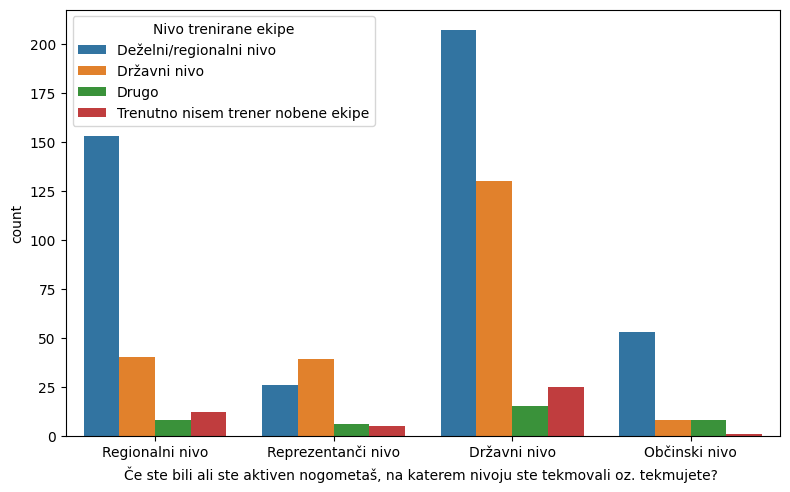

In [90]:
plt.figure(figsize=(8,5))
sns.countplot(x='Tekmovalni nivo trenerja', hue='Nivo trenirane ekipe', data=df)
plt.tight_layout()
plt.xlabel(questions.Q12.split('(')[0])
plt.show()

In [91]:
df[questions.Q18a] = df['Q18a'].where(df['Q18a'] > 0, np.nan).map({
    1: 'DA',
    2: 'NE',
    3: 'NE'
})
df[questions.Q18b] = df['Q18b'].where(df['Q18b'] > 0, np.nan).map({
    1: 'DA',
    2: 'NE',
    3: 'NE'
})
df[questions.Q18c] = df['Q18c'].where(df['Q18c'] > 0, np.nan).map({
    1: 'DA',
    2: 'NE',
    3: 'NE'
})

In [92]:
df_stopnja = df[[questions.Q18a, questions.Q18b, questions.Q18c, 'Stopnja izobrazbe']].dropna()
df_podrocje = df[[questions.Q18a, questions.Q18b, questions.Q18c, 'Področje izobrazbe']].dropna()

N = df_stopnja.shape[0]
# df_stopnja['Stopnja izobrazbe'] = np.where(df_stopnja.Q41.isin(['Poklicna izobrazba', 'Srednješolska izobrazba']), 'srednješolska ali manj', 'višješolska ali več')
# df_podrocje['Področje izobrazbe'] = df_podrocje['Q42'].apply(lambda x: 'Športno treniranje' if 'Športno treniranje' in x else 'Drugo')

In [93]:
for q in [questions.Q18a, questions.Q18b, questions.Q18c]:
    crosstable = pd.crosstab(df_stopnja[q], df_stopnja['Stopnja izobrazbe'])
    crosstable_w_margins = pd.crosstab(df_stopnja[q], df_stopnja['Stopnja izobrazbe'], margins=True, margins_name='Skupaj')
    display(crosstable_w_margins)

    chi2, p, dof, expected = chi2_contingency(crosstable, correction=False)

    chi2_table = {'value': [f'{chi2:.2f}', f'{N}'],
                 'dof': [dof, ''],
                 'pVal': ['< 0.01' if p < 0.01 else f'{round(p, 2):.2f}', '']
                }
    chi2_table = pd.DataFrame(chi2_table, index=['chi2', 'N']).style.set_caption('Hi-kvadrat test')\
                    .set_table_styles([{
                        'selector': 'caption',
                        'props': [('font-size', '16px'), ('font-weight', 'bold')]
                    }])
    display(chi2_table)

Stopnja izobrazbe,<= srednjesolska,> srednjesolska,Skupaj
Po mojih dosedanjih izkušnjah s trenerstvom bi se ponovno odločil za ta poklic.,,,
DA,197,213,410
NE,40,64,104
Skupaj,237,277,514


,value,dof,pVal
chi2,3.07,1,0.08
N,514,,


Stopnja izobrazbe,<= srednjesolska,> srednjesolska,Skupaj
Vodenje nogometne ekipe ustreza mojim nagnjenjem.,,,
DA,220,258,478
NE,17,19,36
Skupaj,237,277,514


,value,dof,pVal
chi2,0.02,1,0.89
N,514,,


Stopnja izobrazbe,<= srednjesolska,> srednjesolska,Skupaj
"V času mojega trenerstva pogosto mislim na to, da bi prenehal s tovrstnim delom.",,,
DA,34,69,103
NE,203,208,411
Skupaj,237,277,514


,value,dof,pVal
chi2,8.90,1,< 0.01
N,514,,


**Interpretacija:** p-vrednost hi-kvadrat testa je nižja od 0.05 samo za vprašanje o tem ali trenerji razmišljajo o prenehanju opravljanja tovrstnega dela. Iz tega lahko sklepamo, da lahko H0 ovržemo samo za to vprašanje. To pomeni, da je stopnja izobrazbe statistično značilno povezana samo z odgovorom na to vprašanje.

In [82]:
N = df_podrocje.shape[0]
for q in [questions.Q18a, questions.Q18b, questions.Q18c]:
    crosstable = pd.crosstab(df_podrocje[q], df_podrocje['Področje izobrazbe'])
    crosstable_w_margins = pd.crosstab(df_podrocje[q], df_podrocje['Področje izobrazbe'], margins=True, margins_name='Skupaj')
    display(crosstable_w_margins)

    chi2, p, dof, expected = chi2_contingency(crosstable, correction=False)

    chi2_table = {'value': [f'{chi2:.2f}', f'{N}'],
                 'dof': [dof, ''],
                 'pVal': ['< 0.01' if p < 0.01 else f'{round(p, 2):.2f}', '']
                }
    chi2_table = pd.DataFrame(chi2_table, index=['chi2', 'N']).style.set_caption('Hi-kvadrat test')\
                    .set_table_styles([{
                        'selector': 'caption',
                        'props': [('font-size', '16px'), ('font-weight', 'bold')]
                    }])
    display(chi2_table)    

Področje izobrazbe,Drugo,Športno treniranje,Skupaj
Po mojih dosedanjih izkušnjah s trenerstvom bi se ponovno odločil za ta poklic.,,,
DA,488,112,600
NE,112,28,140
Skupaj,600,140,740


,value,dof,pVal
chi2,0.13,1,0.72
N,740,,


Področje izobrazbe,Drugo,Športno treniranje,Skupaj
Vodenje nogometne ekipe ustreza mojim nagnjenjem.,,,
DA,559,131,690
NE,41,9,50
Skupaj,600,140,740


,value,dof,pVal
chi2,0.03,1,0.86
N,740,,


Področje izobrazbe,Drugo,Športno treniranje,Skupaj
"V času mojega trenerstva pogosto mislim na to, da bi prenehal s tovrstnim delom.",,,
DA,122,28,150
NE,478,112,590
Skupaj,600,140,740


,value,dof,pVal
chi2,0.01,1,0.93
N,740,,


**Intepretacija:** Iz p vrednosti hi-kvadrat testa lahko sklepamo, da med odgovori na vprašanja o odnosu do poklica trenerjev in področja izobrazbe ni statistično značilne povezave.

**Na način, ki smo ga uporabili pri tej vaji lahko obdelamo vprašanja, ki vrnejo nominalne spremenljivke. Odgovori tipa Likertove lestvice (ordinalne spremenljivke) niso primerni za takšno obdelavo.**